# WSCC 9-bus performance evaluation

## Run C++ examples

In [ ]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

WSCC_9bus_mult_coupled ${TOP}/Examples/CIM/WSCC-09_RX/*.xml

In [ ]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

WSCC_9bus_mult_decoupled ${TOP}/Examples/CIM/WSCC-09_RX/*.xml

In [ ]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

WSCC_9bus_mult_diakoptics ${TOP}/Examples/CIM/WSCC-09_RX/*.xml

## Performance

In [1]:
import pandas as pd
from dpsim.MeasurementUtils import Measurement
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [1]:
#%%capture
logs_dir = '../../../dpsim-logs/logs_9bus/'
coupled_mean = []
coupled_max = []
coupled_std = []

for copies in range(0,20):    
    for threads in range(0,13,2):   
        seq_meas = []
        for seq in range(1,11):
            log_path =  logs_dir + 'WSCC_9bus_coupled_' + str(copies) + '_' + str(threads) + '_' + str(seq) + '/' + \
                        'WSCC_9bus_coupled_' + str(copies) + '_' + str(threads) + '_' + str(seq) + '_step_times.log'            
            meas = Measurement.read_timestep_csv(log_path)['step_time'].data
            # aggregate the measurements from the different iterations
            seq_meas = np.concatenate( (seq_meas, meas), axis=0)

        #coupled_meas.append({'copies': copies, 'threads': threads, 'values': meas['step_time'].data})         
        coupled_mean.append({'copies': copies, 'threads': threads, 'values': seq_meas.mean()})   
        coupled_max.append({'copies': copies, 'threads': threads, 'values': seq_meas.max()})   
        coupled_std.append({'copies': copies, 'threads': threads, 'values': seq_meas.std()})   
        
pd_coupled_mean = pd.DataFrame(coupled_mean)
pd_coupled_max = pd.DataFrame(coupled_max)
pd_coupled_std = pd.DataFrame(coupled_std)

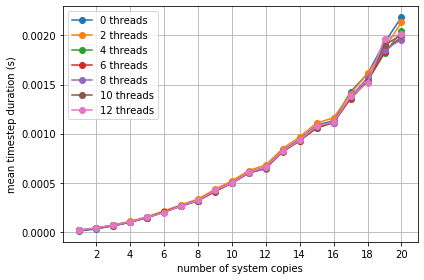

In [2]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
copies = np.arange(1,21)

for threads in range(0,13,2):
    plt.plot(copies, pd_coupled_mean.query('threads=='+str(threads))['values'].values, label=str(threads)+' threads', marker='o')

plt.xlabel('number of system copies')
plt.ylabel('mean timestep duration (s)')
plt.grid()
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('9bus_coupled.pdf')
pd_coupled_mean.to_csv('pd_coupled_mean.csv')

In [4]:
logs_dir = '../../../dpsim-logs/logs_9bus/'
decoupled_mean = []
decoupled_max = []
decoupled_std = []

for copies in range(0,20):    
    for threads in range(0,13,2):   
        seq_meas = []
        for seq in range(1,11):
            log_path =  logs_dir + 'WSCC_9bus_decoupled_' + str(copies) + '_' + str(threads) + '_' + str(seq) + '/' + \
                        'WSCC_9bus_decoupled_' + str(copies) + '_' + str(threads) + '_' + str(seq) + '_step_times.log'      
            
            meas = Measurement.read_timestep_csv(log_path)['step_time'].data
            # aggregate the measurements from the different iterations
            seq_meas = np.concatenate( (seq_meas, meas), axis=0)
            
        #coupled_meas.append({'copies': copies, 'threads': threads, 'values': meas['step_time'].data})         
        decoupled_mean.append({'copies': copies, 'threads': threads, 'values': seq_meas.mean()})   
        decoupled_max.append({'copies': copies, 'threads': threads, 'values': seq_meas.max()})   
        decoupled_std.append({'copies': copies, 'threads': threads, 'values': seq_meas.std()})   
        
pd_decoupled_mean = pd.DataFrame(decoupled_mean)
pd_decoupled_max = pd.DataFrame(decoupled_max)
pd_decoupled_std = pd.DataFrame(decoupled_std)

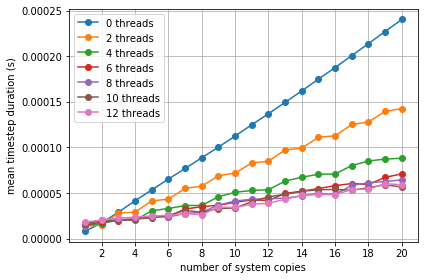

In [3]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
copies = np.arange(1,21)

for threads in range(0,13,2):    
    plt.plot(copies, pd_decoupled_mean.query('threads=='+str(threads))['values'].values, label=str(threads)+' threads', marker='o')

#plt.ylim([0,0.00025])

plt.xlabel('number of system copies')
plt.ylabel('mean timestep duration (s)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('9bus_decoupled.pdf')
pd_decoupled_mean.to_csv('pd_decoupled_mean.csv')

In [6]:
#%%capture
logs_dir = '../../../dpsim-logs/logs_9bus/'
diakoptics_mean = []
diakoptics_max = []
diakoptics_std = []
            
for copies in range(0,20):    
    for threads in range(0,13,2):   
        for splits in range(0, copies+2):
            seq_meas = []
            for seq in range(1,11):
                log_path =  logs_dir + 'WSCC_9bus_diakoptics_' + str(copies) + '_' + str(threads) + '_' + str(splits) + '_' + str(seq) + '/' + \
                            'WSCC_9bus_diakoptics_' + str(copies) + '_' + str(threads) + '_' + str(splits) + '_' + str(seq) + '_step_times.log'            

                meas = Measurement.read_timestep_csv(log_path)['step_time'].data
                # aggregate the measurements from the different iterations
                seq_meas = np.concatenate( (seq_meas, meas), axis=0)

            #diakoptics_meas.append({'copies': copies, 'threads': threads, 'splits': splits, 'values': meas['step_time'].data})         
            diakoptics_mean.append({'copies': copies, 'threads': threads, 'splits': splits, 'values': seq_meas.mean()})   
            diakoptics_max.append({'copies': copies, 'threads': threads, 'splits': splits, 'values': seq_meas.max()})   
            diakoptics_std.append({'copies': copies, 'threads': threads, 'splits': splits, 'values': seq_meas.std()})   
        
pd_diakoptics_mean = pd.DataFrame(diakoptics_mean)
pd_diakoptics_max = pd.DataFrame(diakoptics_max)
pd_diakoptics_std = pd.DataFrame(diakoptics_std)

In [7]:
diakoptics_mean_split_min = []
for copies in range(0,20):    
    for threads in range(0,13,2): 
        split_min_num = copies+1
        split_min = pd_diakoptics_mean.query('copies=='+str(copies)+' and threads=='+str(threads)+' and splits=='+str(split_min_num))['values'].iloc[0]
        for splits in range(1, copies+1):
            tmp = pd_diakoptics_mean.query('copies=='+str(copies)+' and threads=='+str(threads)+' and splits=='+str(splits))['values'].iloc[0]
            if tmp < split_min:
                split_min_num = splits
                split_min = tmp
                
        diakoptics_mean_split_min.append({'copies': copies, 'threads': threads, 'splits': split_min_num, 'values': split_min})  
        
pd_diakoptics_mean_split_min = pd.DataFrame(diakoptics_mean_split_min)

In [ ]:
pd_diakoptics_mean_split_min.query('threads=='+str(8))

In [8]:
diakoptics_splits = []
for copies in range(0,20):    
    for threads in range(0,13,2):
        diakoptics_splits.append(pd_diakoptics_mean_split_min.query('copies=='+str(copies)+' and threads=='+str(threads))['splits'].values)

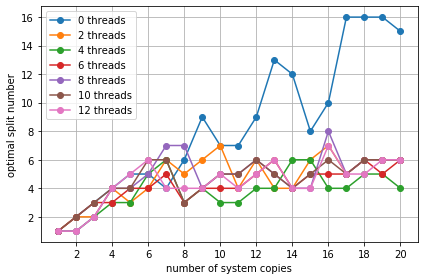

In [5]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
copies = np.arange(1,21)

for threads in range(0,13,2):
    plt.plot(copies, pd_diakoptics_mean_split_min.query('threads=='+str(threads))['splits'].values, label= str(threads) + ' threads', marker='o')

plt.xlabel('number of system copies')
plt.ylabel('optimal split number')
plt.grid()
plt.legend()
plt.tight_layout()

plt.savefig('diakoptics_min_mean_splits.pdf')
pd_diakoptics_mean_split_min.to_csv('pd_diakoptics_mean_split_min.csv')

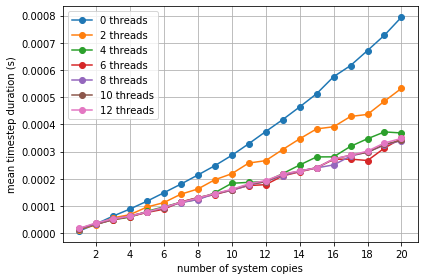

In [11]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
copies = np.arange(1,21)

for threads in range(0,13,2):
    plt.plot(copies, pd_diakoptics_mean_split_min.query('threads=='+str(threads))['values'].values, label= str(threads) + ' threads', marker='o')

plt.xlabel('number of system copies')
plt.ylabel('mean timestep duration (s)')
plt.grid()
plt.legend()
plt.tight_layout()

plt.savefig('9bus_diakoptics.pdf')

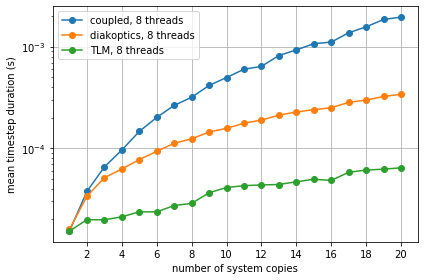

In [7]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
copies = np.arange(1,21)
threads = 8

plt.plot(copies, pd_coupled_mean.query('threads=='+str(threads))['values'].values, label='coupled, 8 threads', marker='o')
plt.plot(copies, pd_diakoptics_mean_split_min.query('threads=='+str(threads))['values'].values, label='diakoptics, 8 threads', marker='o')
plt.plot(copies, pd_decoupled_mean.query('threads=='+str(threads))['values'].values, label='TLM, 8 threads', marker='o')

plt.xlabel('number of system copies')
plt.ylabel('mean timestep duration (s)')
plt.grid()
plt.legend()
plt.yscale('log')
plt.tight_layout()

plt.savefig('9bus_comparison.pdf')